# Task One

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # os operations

# printing files in working directories
for dirname, _, filenames in os.walk('/kaggle/input'): 
    for filename in filenames:
        print(os.path.join(dirname, filename))

# read the main data
data = pd.read_csv("../input/maindata/week-2-data.csv") 

# display some information about the data
data.info() 

/kaggle/input/maindata/week-2-data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-

In [2]:
data[['DL TP > 1 Mbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)']]

,DL TP > 1 Mbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%)
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
149996,0.0,0.0,0.0,0.0
149997,0.0,0.0,0.0,0.0
149998,0.0,0.0,0.0,0.0
149999,0.0,0.0,0.0,0.0


**Start by identifying the top 10 handsets used by the customers**

In [3]:
# get the top 10 handsets used by customers using the value_counts() function of a dataframe
# combined with the nlatgest() function on the 'Handset Type' feature.
data['Handset Type'].value_counts().nlargest(n=10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

**Then, identify the top 3 handset manufacturers**

In [4]:
# get the top 3 handset manufacturers using the value_counts() function of a dataframe
# combined with the nlatgest() function on the 'Handset Manufacturer' feature.
data['Handset Manufacturer'].value_counts().nlargest(n=3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

**Next, identify the top 5 handsets per top 3 handset manufacturer**

In [5]:
# first we will get the all the 'Handset type' data of the top 3 hanset manufacturers
apple_manufacturer = data.loc[data['Handset Manufacturer'] == 'Apple', ['Handset Type']]
samsung_manufacturer = data.loc[data['Handset Manufacturer'] == 'Samsung', ['Handset Type']]
huawei_manufacturer = data.loc[data['Handset Manufacturer'] == 'Huawei', ['Handset Type']]

# then we will use the value_counts() function combined with the nlargest() function on 
# the above data to get the top 5 handsets those top 3 manufacturers make. 
print("Top 5 apple headset types\n", apple_manufacturer.value_counts().nlargest(5), "\n")
print("Top 5 samsung headset types\n", samsung_manufacturer.value_counts().nlargest(5), "\n")
print("Top 5 huawei headset types\n", huawei_manufacturer.value_counts().nlargest(5), "\n")

Top 5 apple headset types
 Handset Type           
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
dtype: int64 

Top 5 samsung headset types
 Handset Type                
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
dtype: int64 

Top 5 huawei headset types
 Handset Type                  
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
dtype: int64 



**Make a short interpretation and recommendation to marketing teams**

***Interpretations***

* As we can clearly see from the data, from the top 10 headsets used by customers, 7 of them are Apples products. And eventhough top of this list is Huaweis specific headset product 'Huawei B528S-23A', when we see the combined number of headset products used by customers, Apple is leading. And Samsung is following with Huawei being the third.

* And eventhoug number nine on the list is a samsung product. Considering the total number of headsets made, samsung is the second headset producers.

* Shockingly number 4 on the list is undefined, which is a little bit anoying since its one of the hotest spots on the top 10 headsets used by customers.

***Recomendations***

* [For Apple] Its better to incorporate the specific huawei products' ability to the Apple headset products in order to increase Apple headsets products power and usage by our customers.

* We need to consider marketing our telecom to Huawei and Samsung product customers, because most of our customers are Apple product users.

* We need to get the undefined products names for further analysis.

**Task 1.1 - Aggregate per user the following information in the column**
* ***number of xDR sessions***
* ***Session duration***
* ***the total download (DL) and upload (UL) data***
* ***the total data volume (in Bytes) during this session for each application***



In [6]:
#print(data['Bearer Id'].value_counts()) #9
#print(data['IMSI'].value_counts()) #8
#print(data['MSISDN/Number'].value_counts()) #106856
#print(data['IMEI'].value_counts()) #3852

#print(data['Bearer Id'].value_counts().sum()) # 149010
#print(data['IMSI'].value_counts().sum()) #149431
#print(data['MSISDN/Number'].value_counts().sum()) #148935
#print(data['IMEI'].value_counts().sum()) #149429

In [7]:
# aggregate number of xDr sessions, session duration, total DL & UL data & total datavolume during this session for each application 
# per user
for rownumberX in range(data['IMSI'].nunique()):
    # users identities based on theier International Mobile Sunbscriber Identity
    print('---> Int. Mobile Subsciber Identity -',data['IMSI'].value_counts().index[rownumberX])
    
    # aggregate number of xDr sessions per user
    print('---> Agg. # of xDr sessions',  data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Bearer Id']].count().values)
    
    # aggregate number of session duration per user
    print('---> Agg. # of session duration',  data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Dur. (ms)']].sum().values)
    
    # aggregate number of total DL data per user
    print('---> Agg. # of tot. DL data', data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Total DL (Bytes)']].sum().values)
    
    # aggregate number of total UL data per user
    print('---> Agg. # of tot. UL data', data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Total UL (Bytes)']].sum().values)
    
    # aggregate number of total data volume (in Bytes) during this session for each application
    # Social Media (DL + UL)
    smdl = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Social Media DL (Bytes)']].sum().values 
    smul = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Social Media UL (Bytes)']].sum().values
    print('---> Agg. # of tot. data volume (in Bytes) - Social Media', smdl + smul)
    print('\t---> Social Media DL (in Bytes)', smdl)
    print('\t---> Social Media UL (in Bytes)', smul)

    # YouTube (DL + UL)
    ytdl = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Youtube DL (Bytes)']].sum().values 
    ytul = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Youtube UL (Bytes)']].sum().values
    print('--->Agg. # of tot. data volume (in Bytes) - YouTube', ytdl + ytul)
    print('\t---> YouTube DL (in Bytes)', ytdl)
    print('\t---> YouTube UL (in Bytes)', ytul)
    
    # Netflix (DL + UL)
    ndl = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Netflix DL (Bytes)']].sum().values 
    nul = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Netflix UL (Bytes)']].sum().values
    print('--->Agg. # of tot. data volume (in Bytes) - Netflix', ndl + nul)
    print('\t---> Netflix DL (in Bytes)', ndl)
    print('\t---> Netflix UL (in Bytes)', nul)
    
    # Google (DL + UL)
    gdl = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Google DL (Bytes)']].sum().values 
    gul = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Google UL (Bytes)']].sum().values
    print('--->Agg. # of tot. data volume (in Bytes) - Google', gdl + gul)
    print('\t---> Google DL (in Bytes)', gdl)
    print('\t---> Google UL (in Bytes)', gul)
    
    # Email (DL + UL)
    edl = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Email DL (Bytes)']].sum().values 
    eul = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Email UL (Bytes)']].sum().values
    print('--->Agg. # of tot. data volume (in Bytes) - Email', edl + eul)
    print('\t---> Email DL (in Bytes)', edl)
    print('\t---> Email UL (in Bytes)', eul)
    
    # Gaming (DL + UL)
    gadl = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Gaming DL (Bytes)']].sum().values 
    gaul = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Gaming UL (Bytes)']].sum().values
    print('--->Agg. # of tot. data volume (in Bytes) - Gaming', gadl + gaul)
    print('\t---> Gaming DL (in Bytes)', gadl)
    print('\t---> Gaming UL (in Bytes)', gaul)
    
    # Other (DL + UL)
    odl = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Other DL (Bytes)']].sum().values 
    oul = data.loc[data['IMSI'] == data['IMSI'].value_counts().index[rownumberX], ['Other UL (Bytes)']].sum().values
    print('--->Agg. # of tot. data volume (in Bytes) - Other', odl + oul)
    print('\t---> Other DL (in Bytes)', odl)
    print('\t---> Other UL (in Bytes)', oul)
    
    print('\n')
    

---> Int. Mobile Subsciber Identity - 208202000000000.0
---> Agg. # of xDr sessions [83800]
---> Agg. # of session duration [8.68065453e+09]
---> Agg. # of tot. DL data [3.82320682e+13]
---> Agg. # of tot. UL data [3.45258275e+12]
---> Agg. # of tot. data volume (in Bytes) - Social Media [1.53764314e+11]
	---> Social Media DL (in Bytes) [1.51002556e+11]
	---> Social Media UL (in Bytes) [2.7617585e+09]
--->Agg. # of tot. data volume (in Bytes) - YouTube [1.9029174e+12]
	---> YouTube DL (in Bytes) [9.76583063e+11]
	---> YouTube UL (in Bytes) [9.26334334e+11]
--->Agg. # of tot. data volume (in Bytes) - Netflix [1.90190906e+12]
	---> Netflix DL (in Bytes) [9.77969121e+11]
	---> Netflix UL (in Bytes) [9.23939938e+11]
--->Agg. # of tot. data volume (in Bytes) - Google [6.56018784e+11]
	---> Google DL (in Bytes) [4.83205911e+11]
	---> Google UL (in Bytes) [1.72812873e+11]
--->Agg. # of tot. data volume (in Bytes) - Email [1.89673624e+11]
	---> Email DL (in Bytes) [1.50386197e+11]
	---> Email 

**Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights.**

In [8]:
from scipy import stats
from numba import jit, cuda

#other ways of looking at outliers - ZScore
def zeroscore():
    z = np.abs(stats.zscore(data))
    print(z)

#zeroscore()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


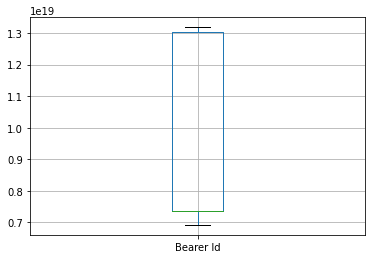

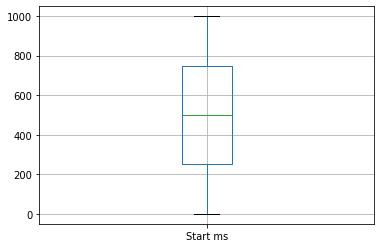

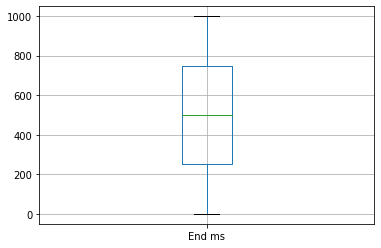

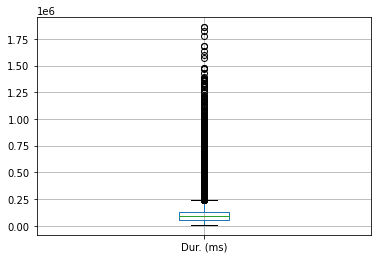

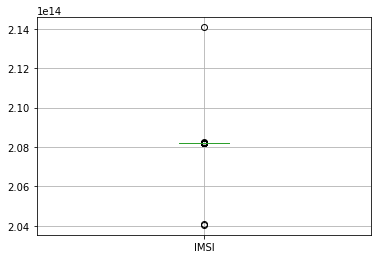

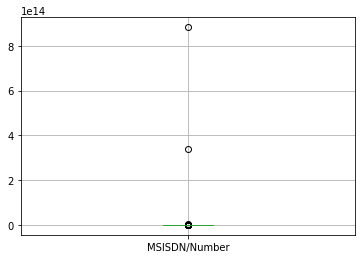

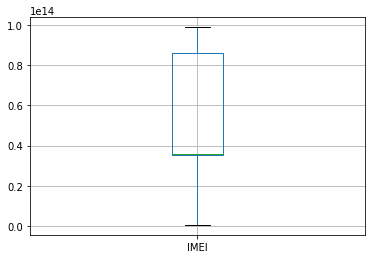

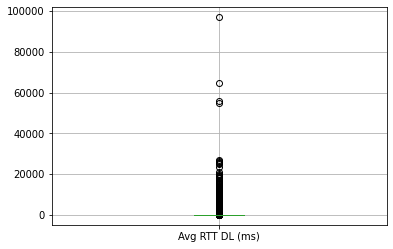

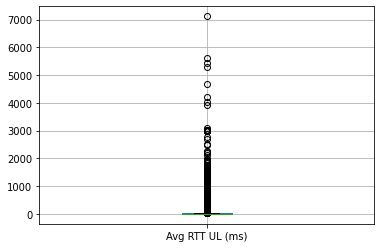

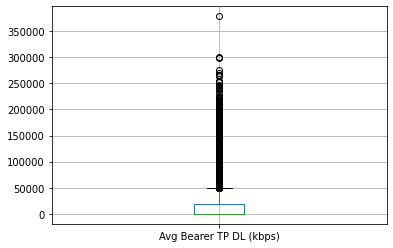

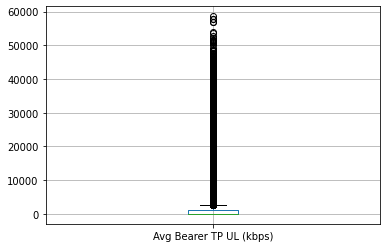

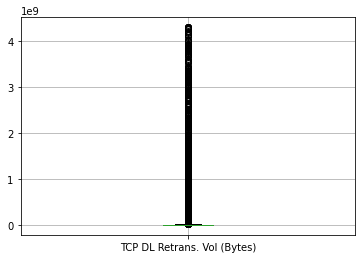

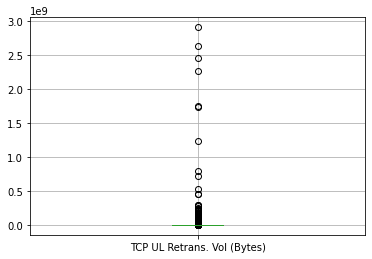

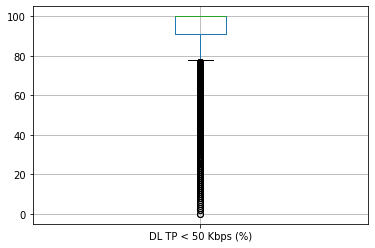

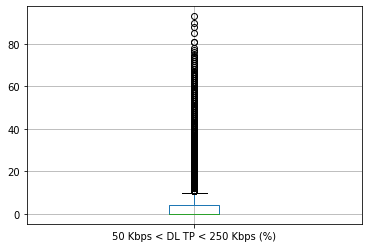

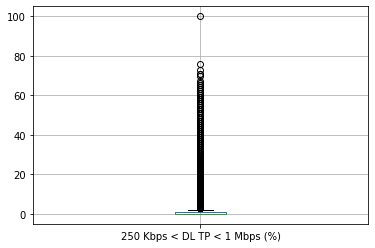

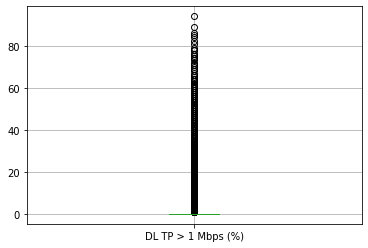

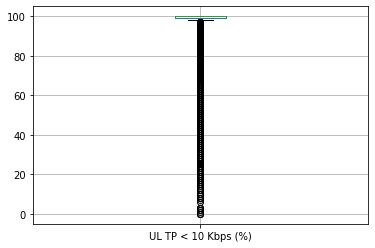

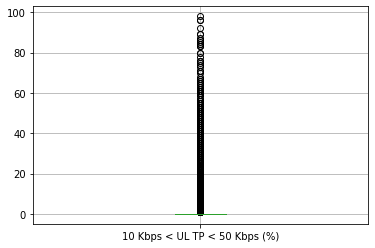

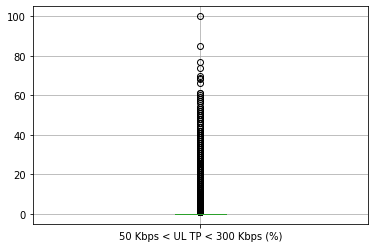

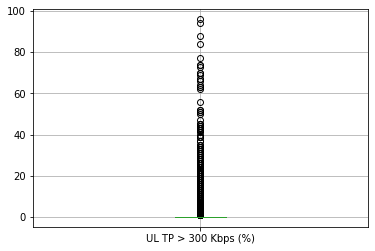

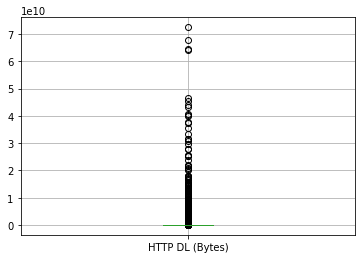

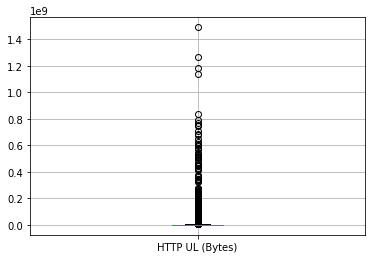

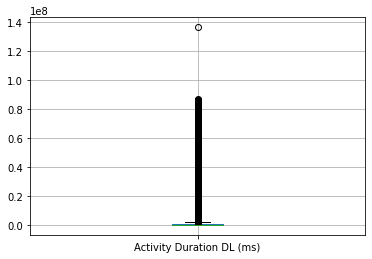

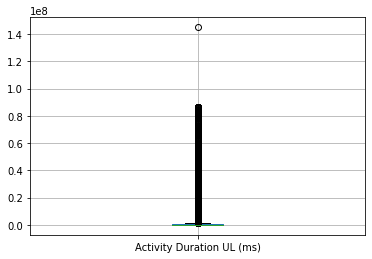

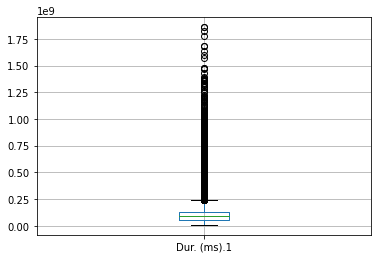

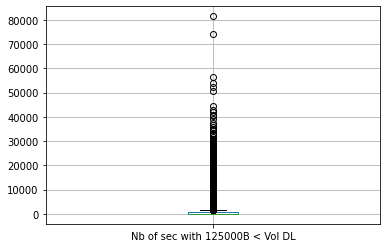

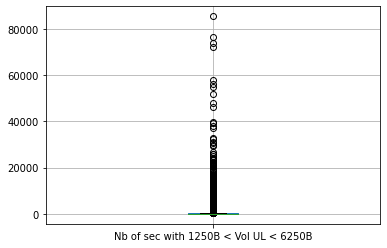

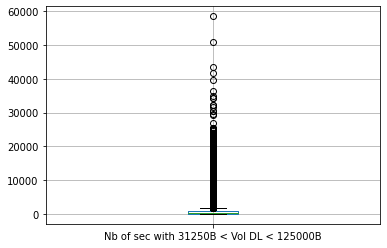

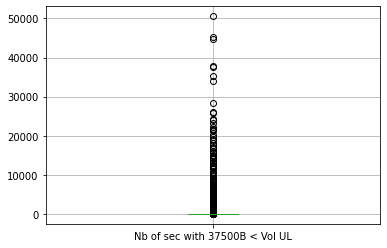

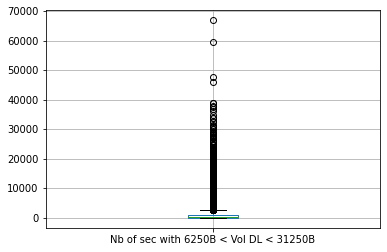

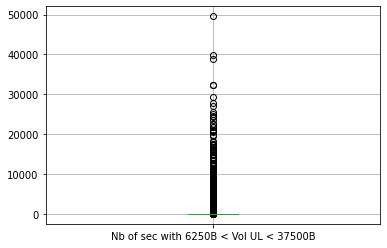

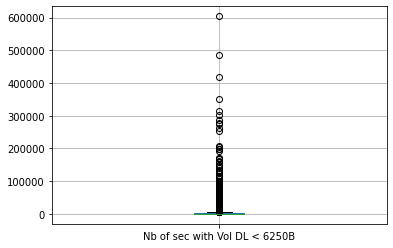

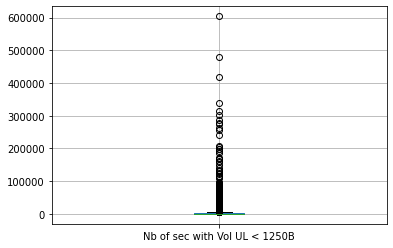

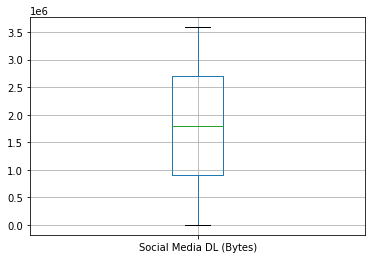

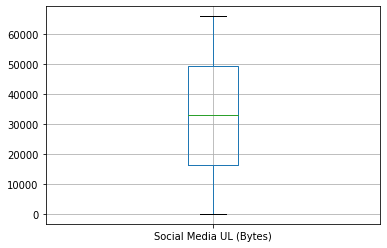

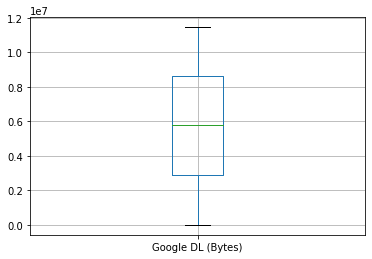

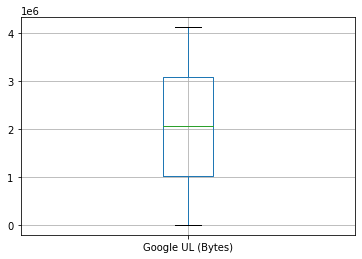

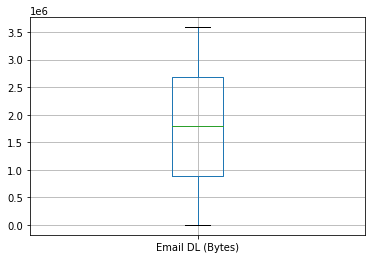

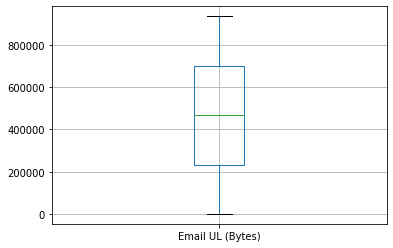

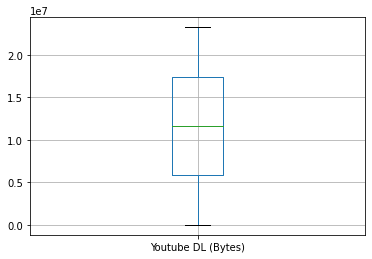

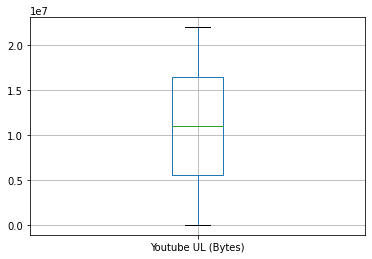

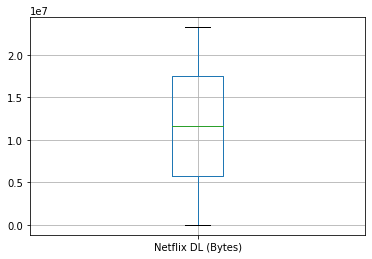

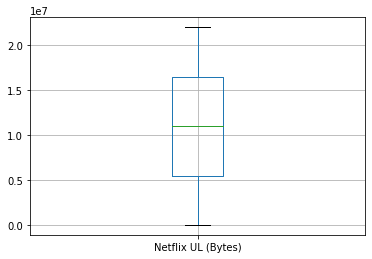

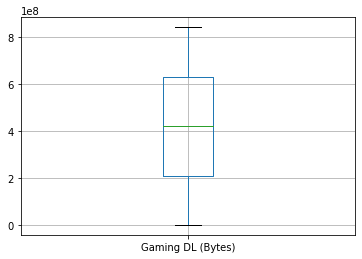

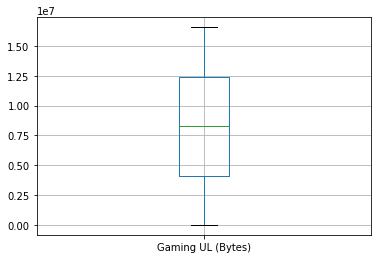

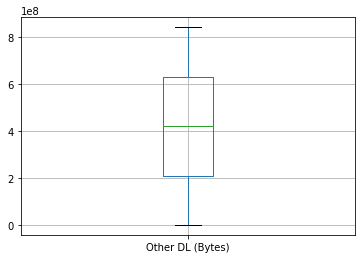

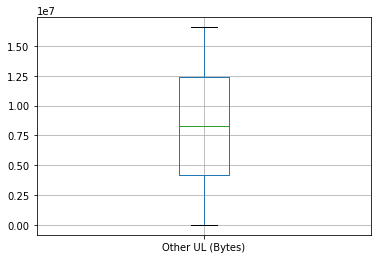

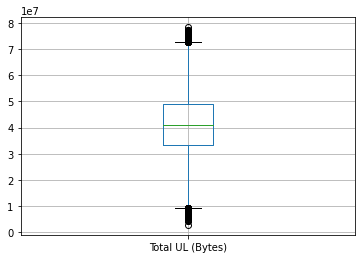

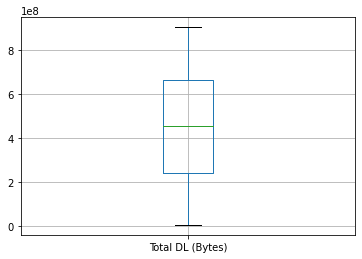

In [9]:
# filling nulls and outliners with the mean
# Visualize column data in order to get outliers

featureNames = data.columns.values
featureNames = featureNames.tolist()
featureNames.remove('Start')
featureNames.remove('End')
featureNames.remove('Last Location Name')
featureNames.remove('Handset Manufacturer')
featureNames.remove('Handset Type')

import matplotlib.pyplot as plt # data visualization
for feature in featureNames:
        plt.figure()
        data.boxplot([feature])

In [10]:
# columns with outliners
outliercols = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
        'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Total UL (Bytes)', 'Dur. (ms)']

# new dataframe to hold outlier cleaned and NaN filled data
new_data = data.copy()

# for all outliner columns
for cols in outliercols:
    print(outliercols.index(cols), cols)
    q1 = new_data[cols].quantile(0.25)
    q3 = new_data[cols].quantile(0.75)
    iqr = q3 - q1

    # calculate upper and lower limits
    lowerlim = q1 - 1.5 * iqr
    upperlim = q3 + 1.5 * iqr

    # remove data greater than the upper limit
    new_data[cols] = new_data.loc[new_data[cols] < upperlim, [cols]]

    # remove data lower than the upper limit
    new_data[cols] = new_data.loc[new_data[cols] > lowerlim, [cols]]

    
    # calculate nulls
    #nulls = data.loc[data[cols].isnull(), [cols]]

    # add nulls 
    #new_data = new_data.append(nulls, verify_integrity = True)

    # sort row index
    #new_data.sort_index(axis = 0, inplace = True)

    
    #print("--", nulls, '--')
    #print(data[cols])
    #print(new_data, "\nmedian=", median, "min=", new_data[cols].min(), 'max=', new_data[cols].max())
    #print('q1=', q1, 'q3=', q3, 'iqr=', iqr, 'lower limit=', lowerlim, 'upper limit=', upperlim)
    #print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")      

print(data.info())
print(new_data.info())

0 Avg RTT DL (ms)
1 Avg RTT UL (ms)
2 Avg Bearer TP DL (kbps)
3 Avg Bearer TP UL (kbps)
4 TCP DL Retrans. Vol (Bytes)
5 TCP UL Retrans. Vol (Bytes)
6 DL TP < 50 Kbps (%)
7 50 Kbps < DL TP < 250 Kbps (%)
8 250 Kbps < DL TP < 1 Mbps (%)
9 DL TP > 1 Mbps (%)
10 UL TP < 10 Kbps (%)
11 10 Kbps < UL TP < 50 Kbps (%)
12 50 Kbps < UL TP < 300 Kbps (%)
13 UL TP > 300 Kbps (%)
14 HTTP DL (Bytes)
15 HTTP UL (Bytes)
16 Activity Duration DL (ms)
17 Activity Duration UL (ms)
18 Dur. (ms).1
19 Nb of sec with 125000B < Vol DL
20 Nb of sec with 1250B < Vol UL < 6250B
21 Nb of sec with 31250B < Vol DL < 125000B
22 Nb of sec with 37500B < Vol UL
23 Nb of sec with 6250B < Vol DL < 31250B
24 Nb of sec with 6250B < Vol UL < 37500B
25 Nb of sec with Vol DL < 6250B
26 Nb of sec with Vol UL < 1250B
27 Social Media DL (Bytes)
28 Total UL (Bytes)
29 Dur. (ms)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                 

In [11]:
# features to clean (all features without the object data type features)
tocleancols = new_data.columns.values.tolist()

# remove the object data type features
tocleancols.remove('Start')
tocleancols.remove('End')
tocleancols.remove('Last Location Name')
tocleancols.remove('Handset Manufacturer')
tocleancols.remove('Handset Type')

# fill na with median for all columns
for col in tocleancols:
    # calculate the mean
    mean = new_data[col].mean()
    # fill the NaN with the median
    new_data[col].fillna(mean, inplace = True)

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [12]:
# handdle the three columns NaN ['Last Location Name', 'Handset Manufacturer', 'Handset Type']
# features with object data types [can not fill with mean]
objectcols = ['Start', 'End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']

new_data['Start'].fillna('4/29/2019 07:28', inplace = True)
new_data['End'].fillna('4/30/2019 10:40', inplace = True)
new_data['Last Location Name'].fillna('L88342B', inplace = True)
new_data['Handset Manufacturer'].fillna('Samsung', inplace = True)
new_data['Handset Type'].fillna('Samsung Galaxy A8 (2018)', inplace = True)

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

**Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective**

In [13]:
print("Mean\n", new_data.mean())
print("Mode\n", new_data.mode())
print("Median\n", new_data.median())
print("Higest\n", new_data.max())
print("lowest\n", new_data.min())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Mean
 Bearer Id                                   1.013887e+19
Start ms                                    4.991882e+02
End ms                                      4.988009e+02
Dur. (ms)                                   9.226114e+04
IMSI                                        2.082017e+14
MSISDN/Number                               4.188282e+10
IMEI                                        4.847454e+13
Avg RTT DL (ms)                             4.715318e+01
Avg RTT UL (ms)                             7.887062e+00
Avg Bearer TP DL (kbps)                     7.425817e+03
Avg Bearer TP UL (kbps)                     3.663716e+02
TCP DL Retrans. Vol (Bytes)                 1.311051e+06
TCP UL Retrans. Vol (Bytes)                 3.371982e+04
DL TP < 50 Kbps (%)                         9.700611e+01
50 Kbps < DL TP < 250 Kbps (%)              1.215844e+00
250 Kbps < DL TP < 1 Mbps (%)               1.781733e-01
DL TP > 1 Mbps (%)                                   NaN
UL TP < 10 Kbps (%)      

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Higest
 Bearer Id                                   13186500000000000000.0
Start                                               4/9/2019 17:42
Start ms                                                     999.0
End                                                4/30/2019 23:59
End ms                                                       999.0
Dur. (ms)                                                 244900.0
IMSI                                             214074000000000.0
MSISDN/Number                                    882397000000000.0
IMEI                                              99001200000000.0
Last Location Name                                         Y72157C
Avg RTT DL (ms)                                              126.0
Avg RTT UL (ms)                                               34.0
Avg Bearer TP DL (kbps)                                    49211.0
Avg Bearer TP UL (kbps)                                     2729.0
TCP DL Retrans. Vol (Bytes)                           

**Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation.**

In [14]:
# statistics module for descriptive statistics, we could also use pandas
import statistics as st

for d in tocleancols:
    print(d)
    # mean
    print("Mean", st.mean(new_data[d]))
    
    # mode - most common value
    #print("Mode", st.mode(new_data[d]))
    
    # median - the center value
    print("Median", st.median(new_data[d]))
    
    # variance
    print("Variance", st.variance(new_data[d]))

    # standard deviation
    print("St. Dev", st.stdev(new_data[d]))
    
    # skew
    # A value less than -1 is skewed to the left; that greater than 1 is skewed to the right. A value between -1 and 1 is symmetric.
    print("Skew", new_data[d].skew())
    print()

Bearer Id
Mean 1.0138871842091147e+19
Median 7.34988e+18
Variance 8.315129806793902e+36
St. Dev 2.883596678940018e+18
Skew 0.026755271770665487

Start ms
Mean 499.1882
Median 499.0
Variance 83296.23555409333
St. Dev 288.6108722035491
Skew 0.0009684377791112438

End ms
Mean 498.80088
Median 500.0
Variance 82999.70444455893
St. Dev 288.0966928733458
Skew -0.0011626339140594255

Dur. (ms)
Mean 92261.13672837778
Median 86399.0
Variance 2428366608.116927
St. Dev 49278.4598797175
Skew 0.6202326545524955

IMSI
Mean 208201691804243.44
Median 208202000000000.0
Variance 4.60188855684385e+20
St. Dev 21452012858.573086
Skew 41.07096185812767

MSISDN/Number
Mean 41882818562.27001
Median 33663797508.0
Variance 5.947408766989616e+24
St. Dev 2438730974705.8237
Skew 333.34241178048296

IMEI
Mean 48474540644914.91
Median 35722400000000.0
Variance 5.005776566970941e+26
St. Dev 22373592842838.05
Skew 1.0735186878648604

Avg RTT DL (ms)
Mean 47.15318435650716
Median 47.15318435650716
Variance 366.029714517

**Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.**